In [5]:
import random
import heapq
import time

# ------------------ CONFIGURATION ------------------
ROWS, COLS = 6, 6           # Grid size
EMPTY, WALL = 0, 1
START = (0, 0)
GOAL = (ROWS - 1, COLS - 1)
WALL_PROBABILITY = 0.25      # Initial walls
CHANGE_PROBABILITY = 0.3     # Probability of wall change during movement

# ------------------ A* SEARCH FUNCTION ------------------
def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    pq = []
    heapq.heappush(pq, (0, start))
    came_from = {}
    g_score = {start: 0}

    while pq:
        _, current = heapq.heappop(pq)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        # Explore neighbors
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = current[0] + dx, current[1] + dy
            neighbor = (nx, ny)

            if 0 <= nx < ROWS and 0 <= ny < COLS and grid[nx][ny] == EMPTY:
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(pq, (f, neighbor))

    return None  # No path found

# ------------------ GRID FUNCTIONS ------------------
def generate_grid():
    grid = [[EMPTY for _ in range(COLS)] for _ in range(ROWS)]
    for i in range(ROWS):
        for j in range(COLS):
            if random.random() < WALL_PROBABILITY and (i, j) not in [START, GOAL]:
                grid[i][j] = WALL
    return grid

def random_change(grid):
    x, y = random.randint(0, ROWS-1), random.randint(0, COLS-1)
    if (x, y) not in [START, GOAL]:
        grid[x][y] = WALL if grid[x][y] == EMPTY else EMPTY
        return (x, y)
    return None

def print_grid(grid, agent_pos=None):
    for i in range(ROWS):
        for j in range(COLS):
            if agent_pos == (i, j):
                print("A", end=" ")
            elif (i, j) == GOAL:
                print("G", end=" ")
            elif grid[i][j] == WALL:
                print("#", end=" ")
            else:
                print(".", end=" ")
        print()
    print()

# ------------------ ADAPTIVE AGENT ------------------
def adaptive_agent(grid):
    current = START
    total_steps = 0
    replans = 0
    start_time = time.time()

    while current != GOAL:
        path = astar(grid, current, GOAL)
        if not path:
            # Goal unreachable
            return False, total_steps, replans, time.time() - start_time

        replans += 1
        for step in path:
            # Random dynamic change
            if random.random() < CHANGE_PROBABILITY:
                random_change(grid)

            # Check if path blocked
            if grid[step[0]][step[1]] == WALL:
                break  # Replan from current

            current = step
            total_steps += 1

            if current == GOAL:
                return True, total_steps, replans, time.time() - start_time

    return True, total_steps, replans, time.time() - start_time

# ------------------ RUN 50 SCENARIOS ------------------
success_count = 0

for scenario in range(1, 51):
    print(f"========== Scenario {scenario} ==========")
    grid = generate_grid()
    print("Initial Grid:")
    print_grid(grid, START)

    success, steps, replans, t = adaptive_agent(grid)

    print("Final Grid:")
    print_grid(grid, GOAL if success else START)

    print(f"Path Length: {steps}")
    print(f"Replanning Count: {replans}")
    print(f"Time Taken: {round(t, 4)} sec")
    print(f"Success: {'YES' if success else 'NO'}\n")

    if success:
        success_count += 1

print("========== FINAL EVALUATION ==========")
print(f"Success Rate: {success_count}/50 = {success_count * 2}%")


========== Scenario 1 ==========
Initial Grid:
A . . . . . 
. . # . . # 
. . # . . # 
. . . # # . 
# . # # . . 
# . . . . G 

Final Grid:
. . # . . . 
. . # . . # 
. . # . . # 
. # . # # . 
# . # # . . 
# . . . . A 

Path Length: 10
Replanning Count: 1
Time Taken: 0.0004 sec
Success: YES

========== Scenario 2 ==========
Initial Grid:
A . . # # . 
. . # . . # 
# . . . . . 
. . # . . # 
# # . . . # 
# . . # . G 

Final Grid:
. . . # . . 
. . # . . # 
# . . . . . 
. . # . . # 
# # . . . # 
. . . # . A 

Path Length: 10
Replanning Count: 1
Time Taken: 0.0001 sec
Success: YES

========== Scenario 3 ==========
Initial Grid:
A . # . # . 
. . . . . . 
. . . # # . 
# . . # . . 
. . # . . . 
. . . # . G 

Final Grid:
A . # . # . 
. . . . . # 
. # . # # . 
. . . # . . 
. . # . . . 
. . . # . G 

Path Length: 5
Replanning Count: 1
Time Taken: 0.0002 sec
Success: NO

========== Scenario 4 ==========
Initial Grid:
A . . . . . 
. . . # . . 
. . . . . . 
. . . . . # 
. . . . # . 
. . # # # G 

Final 

In [6]:
# ------------------ RULES ------------------
rules = [
    {"conditions": ["high_traffic", "no_user_activity"], "conclusion": "DDoS"},
    {"conditions": ["many_ports_scanned"], "conclusion": "Port Scan"},
    {"conditions": ["suspicious_files", "unexpected_connections"], "conclusion": "Malware"},
    {"conditions": ["high_cpu", "high_memory"], "conclusion": "Malware"},
    {"conditions": ["multiple_login_failures", "suspicious_ips"], "conclusion": "Brute Force Attack"}
]

# ------------------ SCENARIOS ------------------
attack_scenarios = [
    {"high_traffic": True, "no_user_activity": True, "expected": "DDoS"},
    {"many_ports_scanned": True, "expected": "Port Scan"},
    {"suspicious_files": True, "unexpected_connections": True, "expected": "Malware"},
    {"high_cpu": True, "high_memory": True, "expected": "Malware"},
    {"multiple_login_failures": True, "suspicious_ips": True, "expected": "Brute Force Attack"},
    {"high_traffic": True, "no_user_activity": False, "expected": "Unknown"},
    {"suspicious_files": True, "unexpected_connections": False, "expected": "Unknown"},
    {"many_ports_scanned": False, "expected": "Unknown"},
    {"high_cpu": True, "high_memory": False, "expected": "Unknown"},
    {"multiple_login_failures": True, "suspicious_ips": False, "expected": "Unknown"}
]

# ------------------ EXPERT SYSTEM ------------------
def diagnose(facts):
    known_facts = facts.copy()
    reasoning_trace = []
    threat_detected = "Unknown"
    
    # Forward chaining
    for rule in rules:
        conditions_met = True
        missing_facts = []
        for cond in rule["conditions"]:
            if cond not in known_facts:
                # Ask user if fact is missing
                response = input(f"Is '{cond}' present? (yes/no): ").strip().lower()
                if response == "yes":
                    known_facts[cond] = True
                else:
                    known_facts[cond] = False
            if not known_facts[cond]:
                conditions_met = False
        if conditions_met:
            threat_detected = rule["conclusion"]
            reasoning_trace.append(f"Rule fired: IF {' AND '.join(rule['conditions'])} THEN {rule['conclusion']}")
            break  # Stop after first matching rule

    if not reasoning_trace:
        reasoning_trace.append("No rules fired. Threat unknown.")

    return threat_detected, reasoning_trace

# ------------------ RUN 10 SCENARIOS ------------------
correct_count = 0

for idx, scenario in enumerate(attack_scenarios, 1):
    print(f"\n========== Scenario {idx} ==========")
    # Remove expected key for diagnosis
    facts = {k:v for k,v in scenario.items() if k != "expected"}
    expected = scenario["expected"]
    
    threat, trace = diagnose(facts)
    
    print(f"Diagnosed Threat: {threat}")
    print(f"Expected Threat: {expected}")
    print("Reasoning Trace:")
    for step in trace:
        print(" -", step)
    
    if threat == expected:
        correct_count += 1

accuracy = (correct_count / len(attack_scenarios)) * 100
print(f"\n========== FINAL EVALUATION ==========")
print(f"Accuracy: {correct_count}/{len(attack_scenarios)} = {accuracy}%")



========== Scenario 1 ==========
Diagnosed Threat: DDoS
Expected Threat: DDoS
Reasoning Trace:
 - Rule fired: IF high_traffic AND no_user_activity THEN DDoS

========== Scenario 2 ==========
Diagnosed Threat: DDoS
Expected Threat: Port Scan
Reasoning Trace:
 - Rule fired: IF high_traffic AND no_user_activity THEN DDoS

========== Scenario 3 ==========
Diagnosed Threat: Malware
Expected Threat: Malware
Reasoning Trace:
 - Rule fired: IF suspicious_files AND unexpected_connections THEN Malware

========== Scenario 4 ==========
Diagnosed Threat: Port Scan
Expected Threat: Malware
Reasoning Trace:
 - Rule fired: IF many_ports_scanned THEN Port Scan

========== Scenario 5 ==========
Diagnosed Threat: DDoS
Expected Threat: Brute Force Attack
Reasoning Trace:
 - Rule fired: IF high_traffic AND no_user_activity THEN DDoS

========== Scenario 6 ==========
Diagnosed Threat: Unknown
Expected Threat: Unknown
Reasoning Trace:
 - No rules fired. Threat unknown.

========== Scenario 7 ==========
Dia

In [8]:
import copy
import random

# ------------------ CONFIG ------------------
ROWS, COLS = 6, 7
PLAYER_X = "X"   # our agent
PLAYER_O = "O"   # opponent
EMPTY = " "
MEMORY_LIMIT = 100  # max game states at a time

# ------------------ BOARD FUNCTIONS ------------------
def create_board():
    return [[EMPTY for _ in range(COLS)] for _ in range(ROWS)]

def print_board(board):
    for row in board:
        print("|".join(row))
    print("-" * (2*COLS-1))

def available_moves(board):
    # Return columns which are not full
    return [c for c in range(COLS) if board[0][c] == EMPTY]

def make_move(board, col, player):
    for r in reversed(range(ROWS)):
        if board[r][col] == EMPTY:
            board[r][col] = player
            return True
    return False

def terminal_state(board):
    # Check rows, columns, diagonals
    for r in range(ROWS):
        for c in range(COLS):
            if board[r][c] == EMPTY:
                continue
            player = board[r][c]
            # Horizontal
            if c <= COLS-4 and all(board[r][c+i]==player for i in range(4)):
                return True, player
            # Vertical
            if r <= ROWS-4 and all(board[r+i][c]==player for i in range(4)):
                return True, player
            # Diagonal down-right
            if r <= ROWS-4 and c <= COLS-4 and all(board[r+i][c+i]==player for i in range(4)):
                return True, player
            # Diagonal down-left
            if r <= ROWS-4 and c >= 3 and all(board[r+i][c-i]==player for i in range(4)):
                return True, player
    # Draw
    if all(board[0][c] != EMPTY for c in range(COLS)):
        return True, None
    return False, None

def evaluate(board):
    terminal, winner = terminal_state(board)
    if winner == PLAYER_X:
        return 100
    elif winner == PLAYER_O:
        return -100
    else:
        return 0

# ------------------ MINIMAX AGENT WITH MEMORY LIMIT ------------------
class MinimaxAgent:
    def __init__(self, player, memory_limit=MEMORY_LIMIT):
        self.player = player
        self.memory_limit = memory_limit
        self.memory_used = 0

    def minimax(self, board, depth, alpha, beta, maximizing):
        self.memory_used += 1
        if self.memory_used > self.memory_limit:
            return evaluate(board), None  # stop if memory limit exceeded

        terminal, winner = terminal_state(board)
        if terminal or depth == 0:
            return evaluate(board), None

        moves = available_moves(board)
        # Beam pruning: limit number of moves considered to memory_limit // 10
        moves = moves[:max(1, self.memory_limit//10)]

        best_move = None
        if maximizing:
            max_eval = -float("inf")
            for move in moves:
                new_board = copy.deepcopy(board)
                make_move(new_board, move, PLAYER_X)
                eval_score, _ = self.minimax(new_board, depth-1, alpha, beta, False)
                if eval_score > max_eval:
                    max_eval = eval_score
                    best_move = move
                alpha = max(alpha, eval_score)
                if beta <= alpha:
                    break
            return max_eval, best_move
        else:
            min_eval = float("inf")
            for move in moves:
                new_board = copy.deepcopy(board)
                make_move(new_board, move, PLAYER_O)
                eval_score, _ = self.minimax(new_board, depth-1, alpha, beta, True)
                if eval_score < min_eval:
                    min_eval = eval_score
                    best_move = move
                beta = min(beta, eval_score)
                if beta <= alpha:
                    break
            return min_eval, best_move

    def iterative_deepening(self, board):
        depth = 1
        best_move = None
        self.memory_used = 0
        while self.memory_used < self.memory_limit and depth <= 4:
            score, move = self.minimax(board, depth, -float("inf"), float("inf"), True)
            if move:
                best_move = move
            depth += 1
        return best_move, depth-1, self.memory_used

# ------------------ BASIC OPPONENT ------------------
class BasicOpponent:
    def choose_move(self, board):
        moves = available_moves(board)
        return random.choice(moves)

# ------------------ SIMULATION ------------------
def play_game(memory_limit=MEMORY_LIMIT, verbose=False):
    board = create_board()
    agent = MinimaxAgent(PLAYER_X, memory_limit)
    opponent = BasicOpponent()
    current_player = PLAYER_X
    move_count = 0
    depth_reached = 0
    memory_used = 0

    while True:
        terminal, winner = terminal_state(board)
        if terminal:
            return winner, move_count, depth_reached, memory_used

        if current_player == PLAYER_X:
            move, depth, mem = agent.iterative_deepening(board)
            if move is not None:
                make_move(board, move, PLAYER_X)
            depth_reached = max(depth_reached, depth)
            memory_used = max(memory_used, mem)
        else:
            move = opponent.choose_move(board)
            make_move(board, move, PLAYER_O)

        move_count += 1
        current_player = PLAYER_O if current_player == PLAYER_X else PLAYER_X

        if verbose:
            print_board(board)

# ------------------ RUN MULTIPLE GAMES ------------------
def run_simulation(games=10):
    wins = 0
    losses = 0
    ties = 0
    total_depth = 0
    total_memory = 0

    for i in range(1, games+1):
        print(f"========== Game {i} ==========")
        winner, moves, depth, memory = play_game(verbose=False)
        total_depth += depth
        total_memory += memory
        if winner == PLAYER_X:
            print("Result: X (Agent) wins")
            wins += 1
        elif winner == PLAYER_O:
            print("Result: O (Opponent) wins")
            losses += 1
        else:
            print("Result: Tie")
            ties += 1
        print(f"Depth reached: {depth}, Memory used: {memory}\n")

    print("========== FINAL EVALUATION ==========")
    print(f"Agent Wins: {wins}, Losses: {losses}, Ties: {ties}")
    print(f"Average Depth Reached: {total_depth/games:.2f}")
    print(f"Average Memory Used: {total_memory/games:.2f}")
    print(f"Win Rate: {wins/games*100:.2f}%")

# ------------------ RUN SIMULATION ------------------
if __name__ == "__main__":
    run_simulation(games=10)


========== Game 1 ==========
Result: X (Agent) wins
Depth reached: 4, Memory used: 117

========== Game 2 ==========
Result: O (Opponent) wins
Depth reached: 4, Memory used: 117

========== Game 3 ==========
Result: O (Opponent) wins
Depth reached: 3, Memory used: 111

========== Game 4 ==========
Result: O (Opponent) wins
Depth reached: 3, Memory used: 109

========== Game 5 ==========
Result: O (Opponent) wins
Depth reached: 4, Memory used: 113

========== Game 6 ==========
Result: O (Opponent) wins
Depth reached: 3, Memory used: 112

========== Game 7 ==========
Result: O (Opponent) wins
Depth reached: 3, Memory used: 112

========== Game 8 ==========
Result: O (Opponent) wins
Depth reached: 4, Memory used: 111

========== Game 9 ==========
Result: X (Agent) wins
Depth reached: 3, Memory used: 114

========== Game 10 ==========
Result: O (Opponent) wins
Depth reached: 4, Memory used: 117

========== FINAL EVALUATION ==========
Agent Wins: 2, Losses: 8, Ties: 0
Average Depth Reached:


Dataset Overview:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       

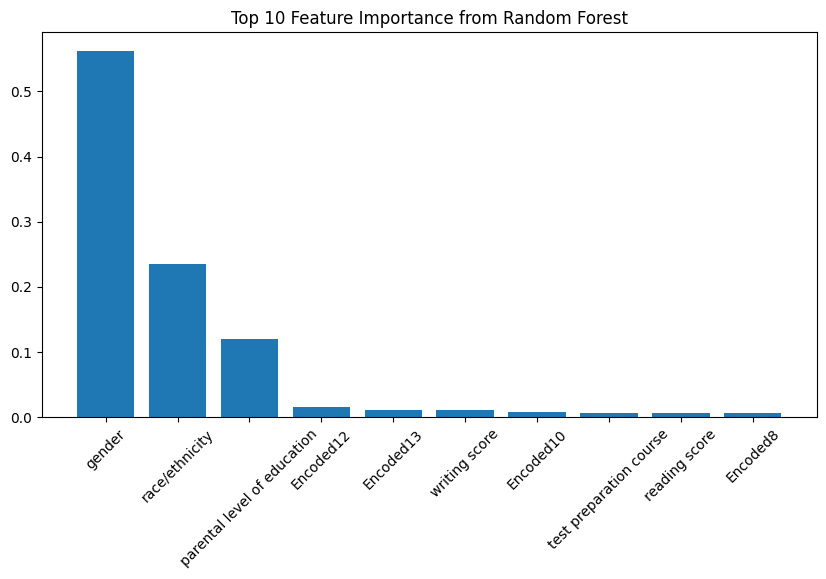

Random Forest R2 Score: 0.8491
SVM R2 Score: 0.7130
Decision Tree R2 Score: 0.7107
Naive Bayes R2 Score: -0.6880


d:\Vs Code\Python\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP R2 Score: 0.8000


d:\Vs Code\Python\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Hybrid Model R2 Score: 0.8522


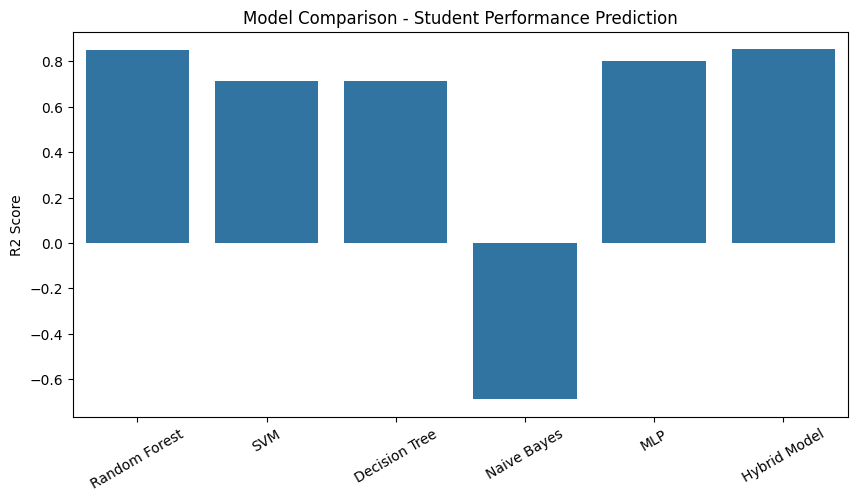

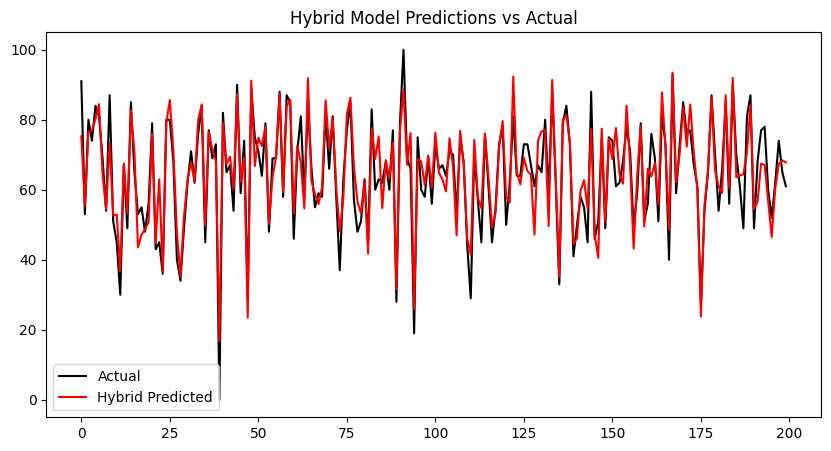


Ethical Considerations:
- Respect student privacy; do not disclose individual predictions.
- Use predictions only to provide academic support, not grading penalties.
- Ensure transparency in communication and decision-making.



In [17]:
# ===============================================================
# HYBRID MODEL FOR PREDICTING STUDENT PERFORMANCE
# ===============================================================

# -----------------------------
# 1. IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# 2. LOAD DATASET
# -----------------------------
df = pd.read_csv("StudentsPerformance.csv")
print("\nDataset Overview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# -----------------------------
# 3. PREPROCESSING
# -----------------------------
target = 'math score'  # predicting final grade
features = df.columns.drop(target)

# Identify categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target).tolist()

# ColumnTransformer: OneHotEncode categorical & scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
    ]
)

X = preprocessor.fit_transform(df[features])
y = df[target].values

# -----------------------------
# 4. TRAIN-TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 5. FEATURE IMPORTANCE (Random Forest)
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10,5))
plt.title("Top 10 Feature Importance from Random Forest")
plt.bar(range(len(indices)), importances[indices], align='center')
feature_names = []
for i in indices:
    if i < len(features):
        feature_names.append(features[i])
    else:
        feature_names.append(f"Encoded{i}")
plt.xticks(range(len(indices)), feature_names, rotation=45)
plt.show()

# -----------------------------
# 6. MODEL TRAINING & EVALUATION
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    """Train model and return R2 score and predictions."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    return score, y_pred

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Naive Bayes": GaussianNB()  # works with Gaussian numeric prediction
}

results = {}
predictions = {}

for name, model in models.items():
    score, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test, name)
    results[name] = score
    predictions[name] = y_pred
    print(f"{name} R2 Score: {score:.4f}")

# -----------------------------
# 7. MLP MODEL
# -----------------------------
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])
mlp.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=0)

mlp_pred = mlp.predict(X_test).flatten()
mlp_r2 = r2_score(y_test, mlp_pred)
results["MLP"] = mlp_r2
predictions["MLP"] = mlp_pred
print(f"MLP R2 Score: {mlp_r2:.4f}")

# -----------------------------
# 8. HYBRID MODEL (RF + MLP)
# -----------------------------
rf_pred_train = rf.predict(X_train).reshape(-1,1)
rf_pred_test = rf.predict(X_test).reshape(-1,1)

X_train_hybrid = np.hstack((X_train, rf_pred_train))
X_test_hybrid = np.hstack((X_test, rf_pred_test))

hybrid_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_hybrid.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
hybrid_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])
hybrid_mlp.fit(X_train_hybrid, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=0)

hybrid_pred = hybrid_mlp.predict(X_test_hybrid).flatten()
hybrid_r2 = r2_score(y_test, hybrid_pred)
results["Hybrid Model"] = hybrid_r2
predictions["Hybrid Model"] = hybrid_pred
print(f"Hybrid Model R2 Score: {hybrid_r2:.4f}")

# -----------------------------
# 9. FINAL COMPARISON PLOT
# -----------------------------
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("R2 Score")
plt.title("Model Comparison - Student Performance Prediction")
plt.xticks(rotation=30)
plt.show()

# -----------------------------
# 10. HYBRID PREDICTION vs ACTUAL
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual', color='black')
plt.plot(predictions["Hybrid Model"], label='Hybrid Predicted', color='red')
plt.title("Hybrid Model Predictions vs Actual")
plt.legend()
plt.show()

# -----------------------------
# 11. ETHICAL CONSIDERATIONS
# -----------------------------
print("""
Ethical Considerations:
- Respect student privacy; do not disclose individual predictions.
- Use predictions only to provide academic support, not grading penalties.
- Ensure transparency in communication and decision-making.
""")
